# Shakespeare Plays - Player Classification

This is a dataset comprised of all of Shakespeare's plays. It includes the following:

The first column is the Data-Line, it just keeps track of all the rows there are.
The second column is the play that the lines are from.
The third column is the actual line being spoken at any given time.
The fourth column is the Act-Scene-Line from which any given line is from.
The fifth column is the player who is saying any given line.
The sixth column is the line being spoken.

# Features in the dataset

Dataline, Play, PlayerLinenumber, ActSceneLine, Player, PlayerLine.

Using some of the above features, we do some feature engineering, add additional features from the existing features and do the analysis.

# 1. Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../notebooks/datasets/Shakespeare_data.csv', encoding='utf-8')

In [3]:
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [4]:
#Drop the nulls
df.dropna(inplace=True)

#Drop the duplicates
df.drop_duplicates(inplace=True)

In [5]:
#Display the dataset now.
df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [6]:
#Drop the attribute DataLine. It has no significant importance.
df = df.drop('Dataline', axis=1)

In [7]:
df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [8]:
#Create a pandas Dataframe with all the unique Play names and naming the column attribute as Play Name.
pd.DataFrame(df['Play'].unique().tolist(), columns=['Play Name'])

,Play Name
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well
5,As you like it
6,Antony and Cleopatra
7,A Comedy of Errors
8,Coriolanus
9,Cymbeline


# 2. EDA

# a. No of players vs Play name

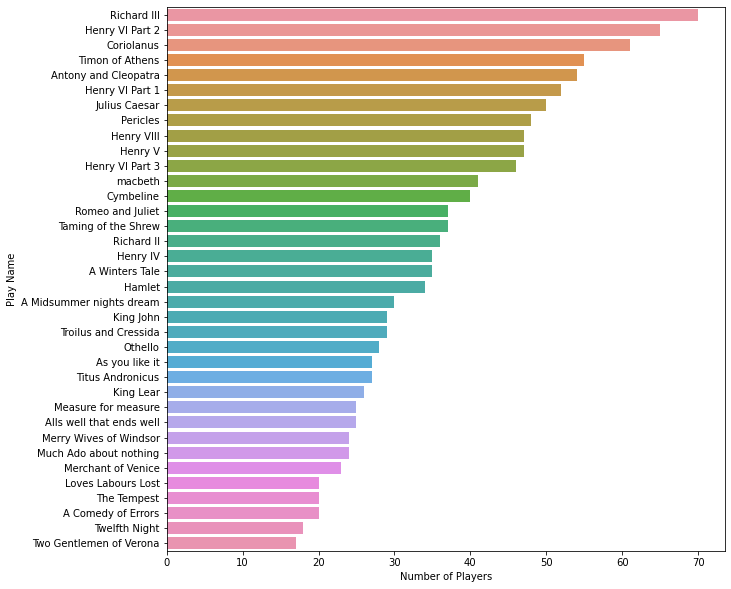

In [9]:
numberPlayers = df.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
numberPlayers

plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

Analysis: The play Richard III has more number of players around 70.

# b. No of lines in each play

In [10]:
#converting the results above to a dataframe.
play_data = df.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
play_data

,Lines,Play
0,4020,Hamlet
1,3768,Coriolanus
2,3756,Cymbeline
3,3705,Richard III
4,3565,Antony and Cleopatra
5,3563,Othello
6,3500,King Lear
7,3491,Troilus and Cressida
8,3364,A Winters Tale
9,3279,Henry VIII


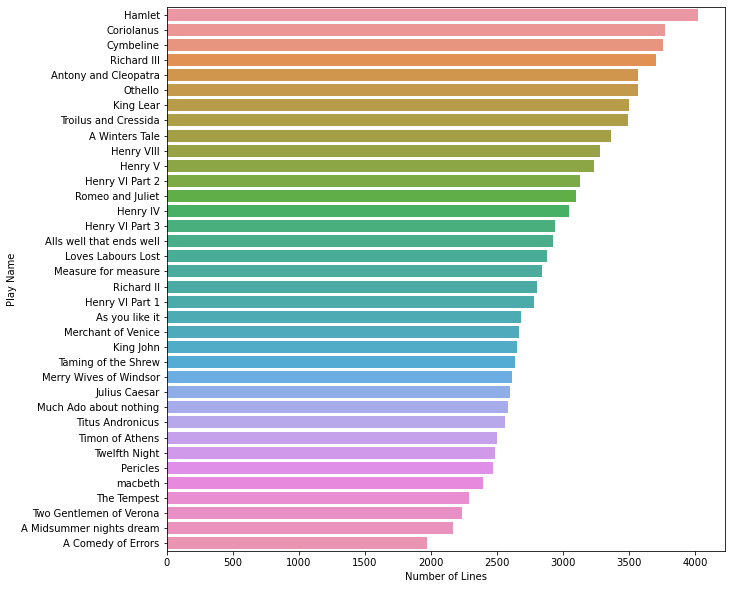

In [11]:
plt.figure(figsize=(10,10))
ax= sns.barplot(x='Lines',y='Play',data=play_data, order = play_data['Play'])
ax.set(xlabel='Number of Lines', ylabel='Play Name')
plt.show()

Analysis: The play Hamlet has more number of lines - 4020 lines.

# c. No of lines by each player

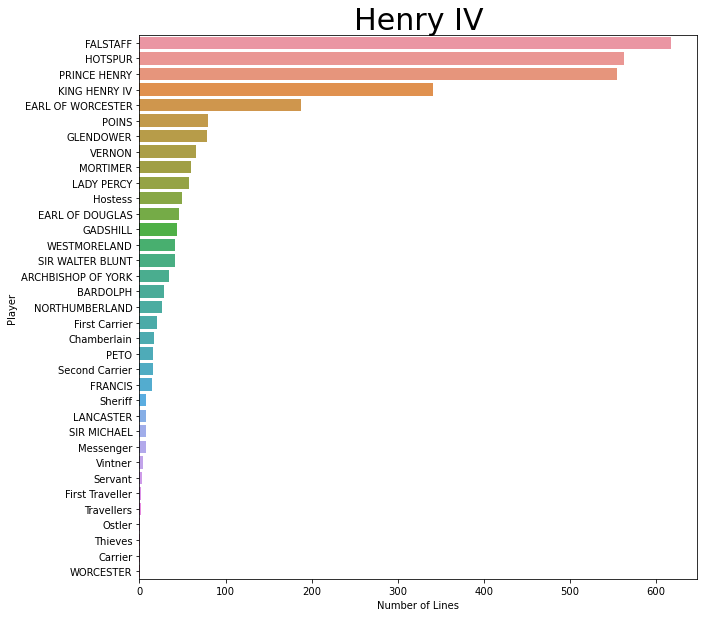

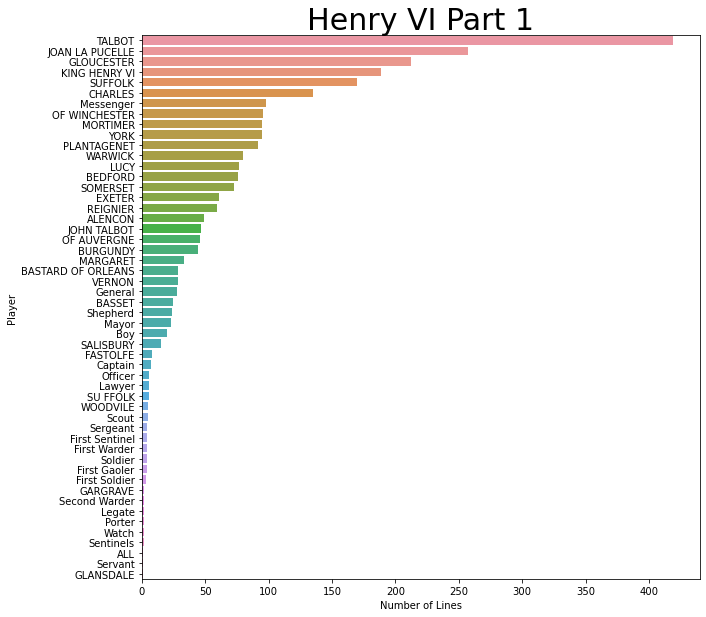

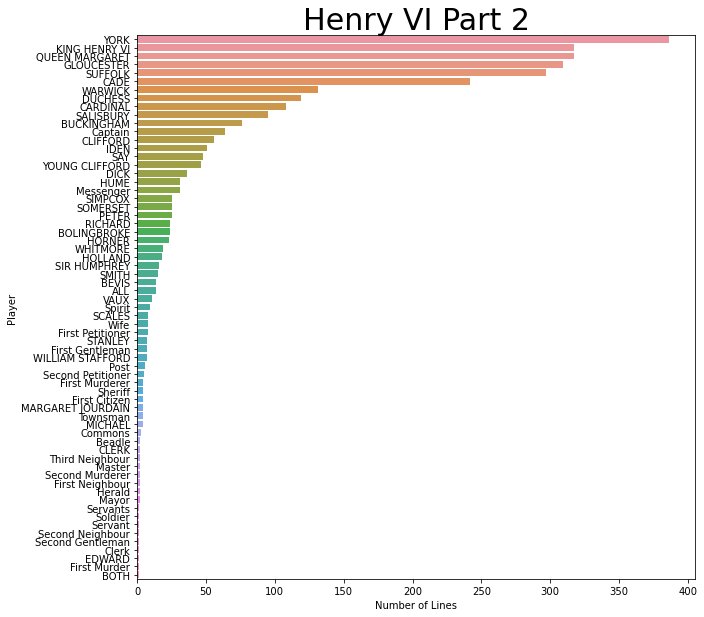

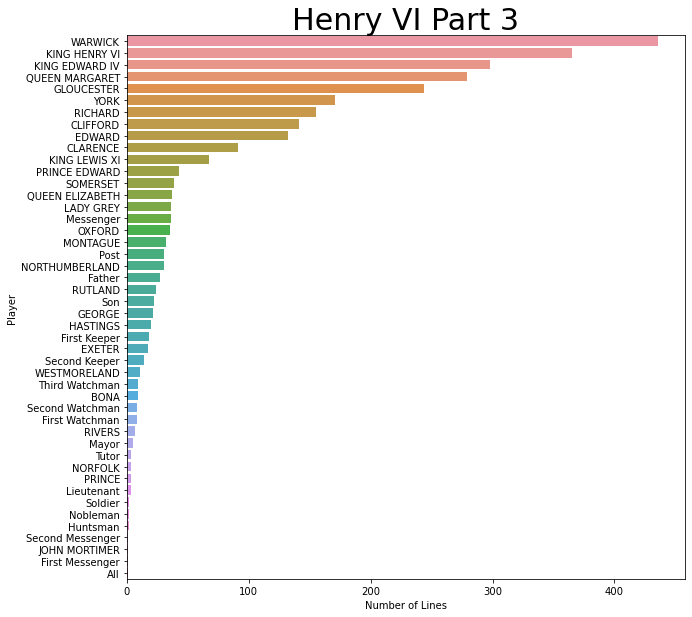

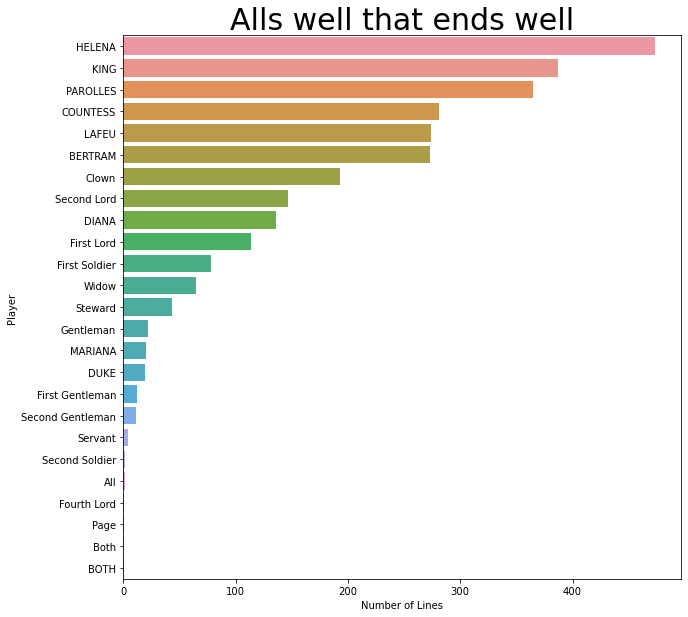

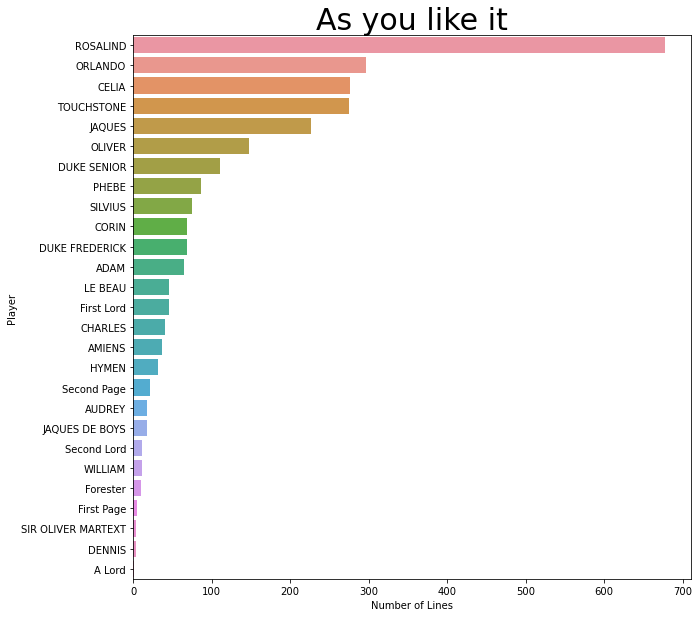

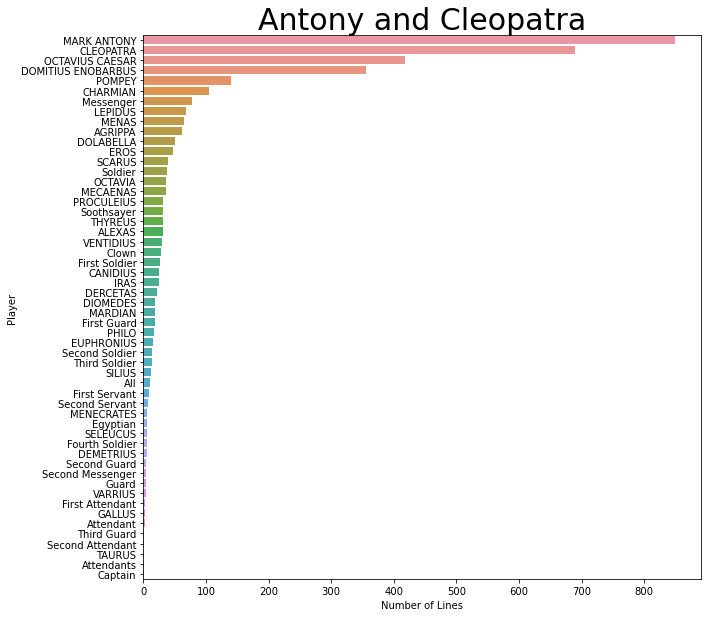

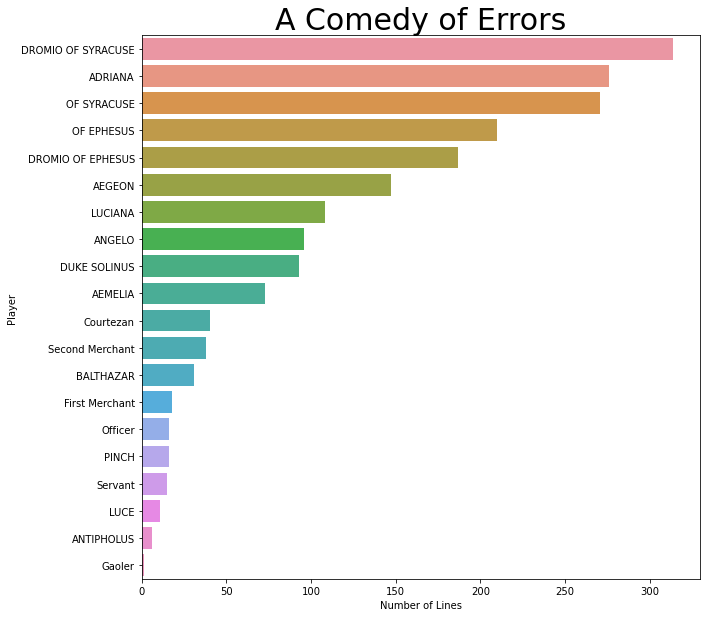

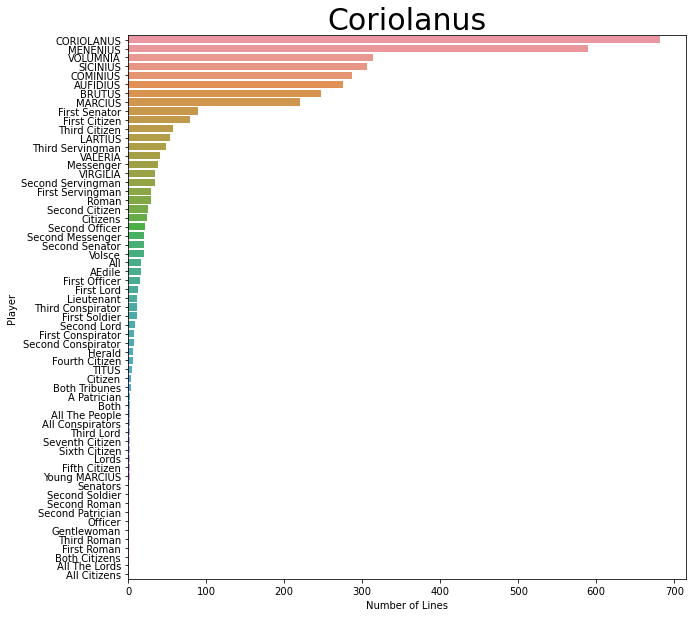

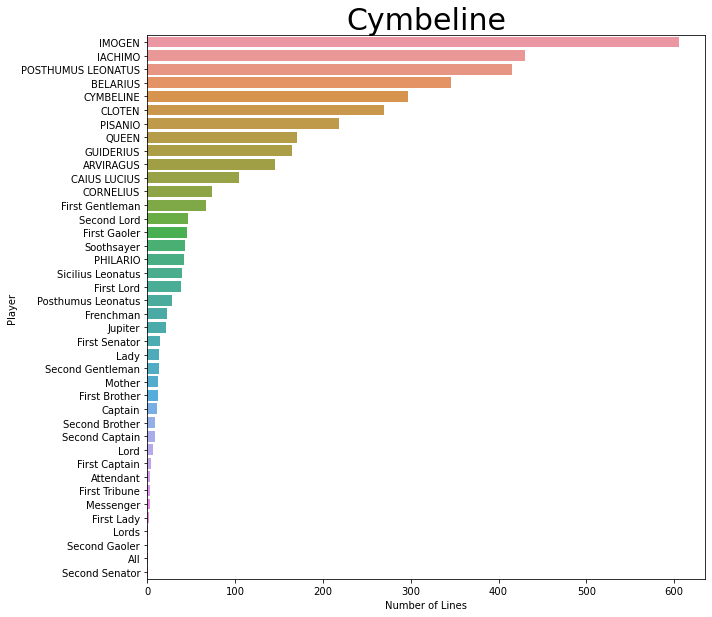

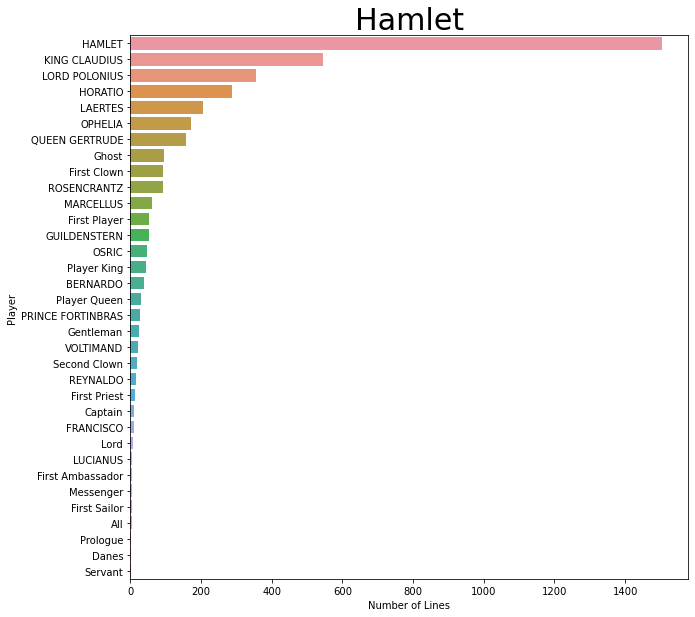

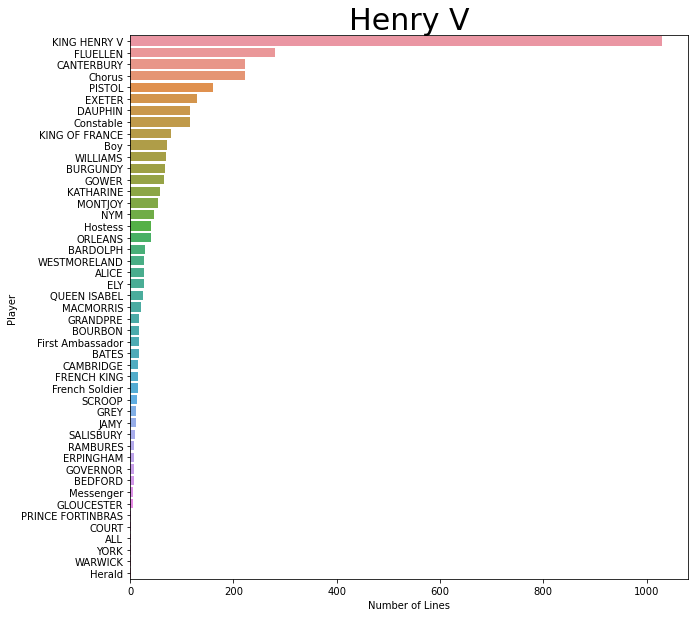

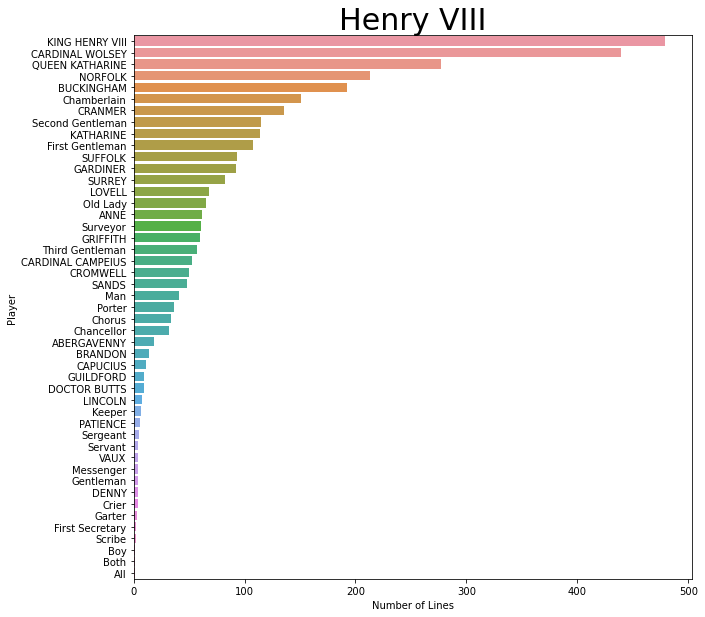

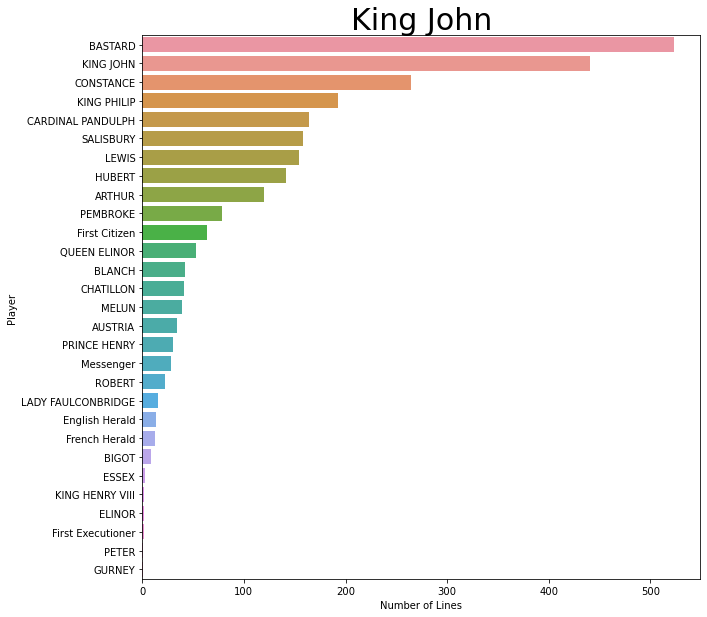

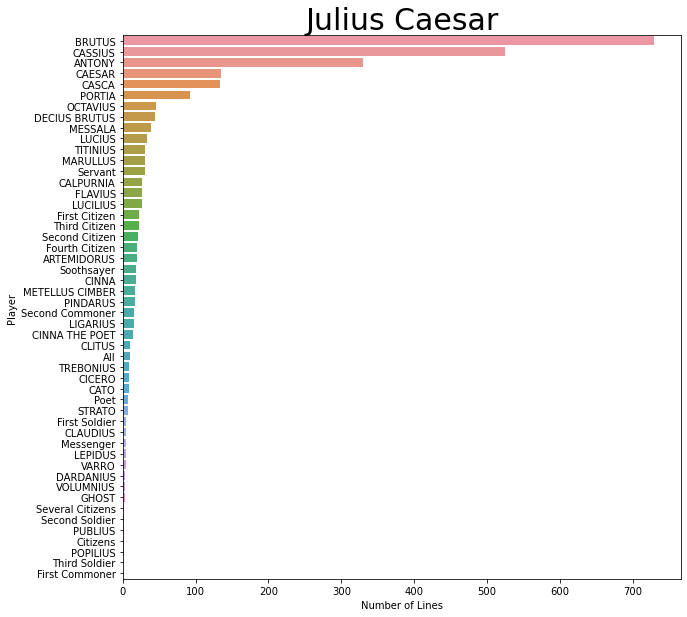

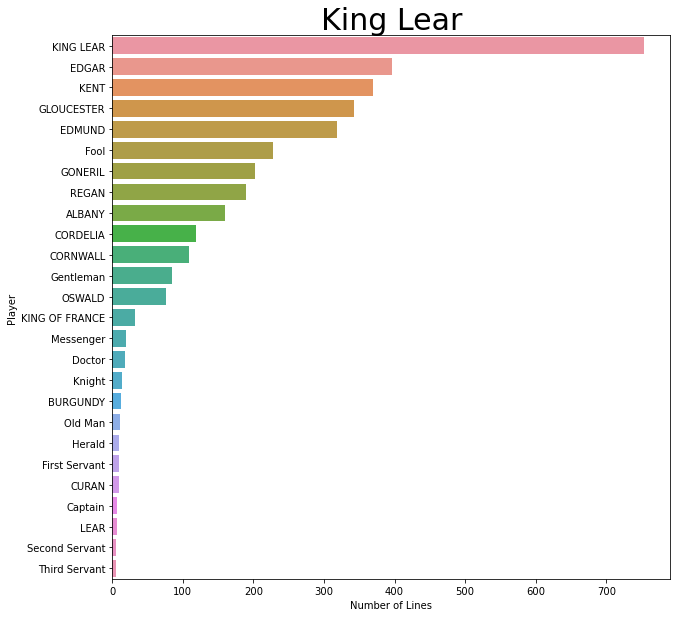

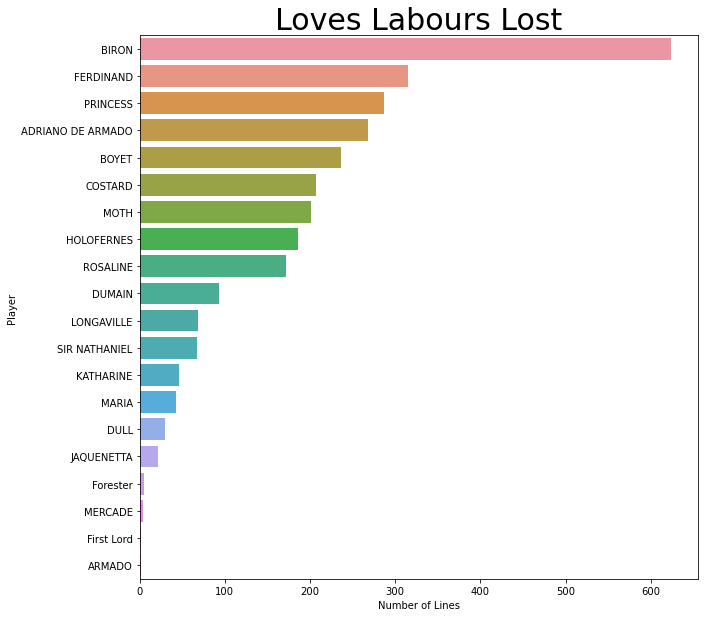

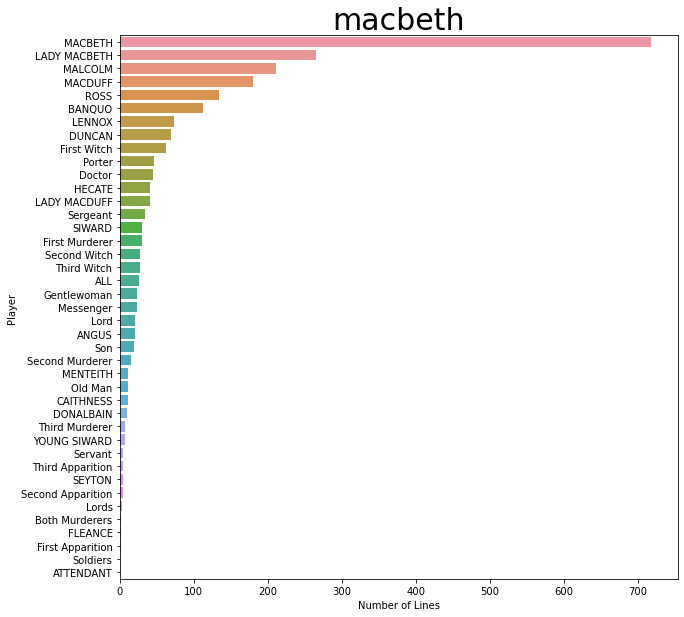

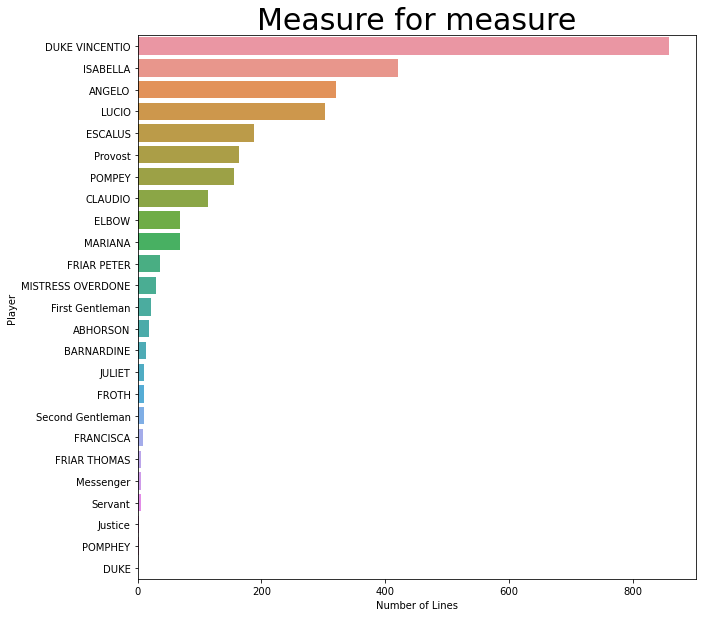

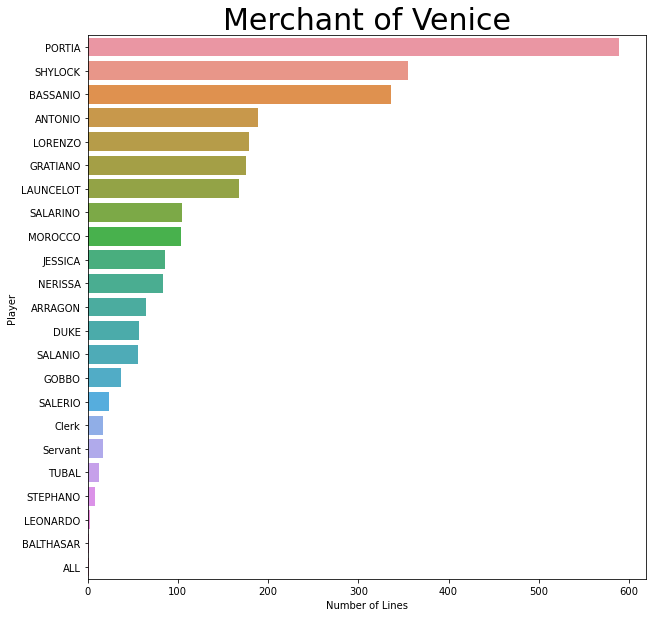

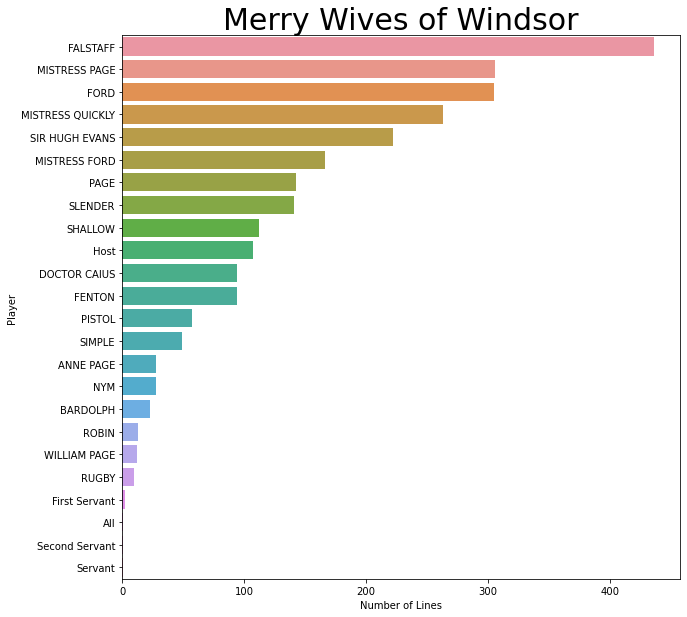

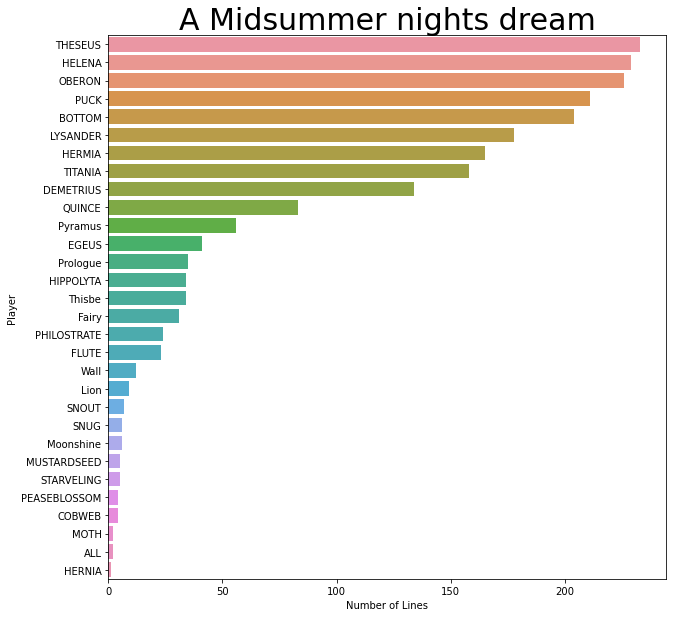

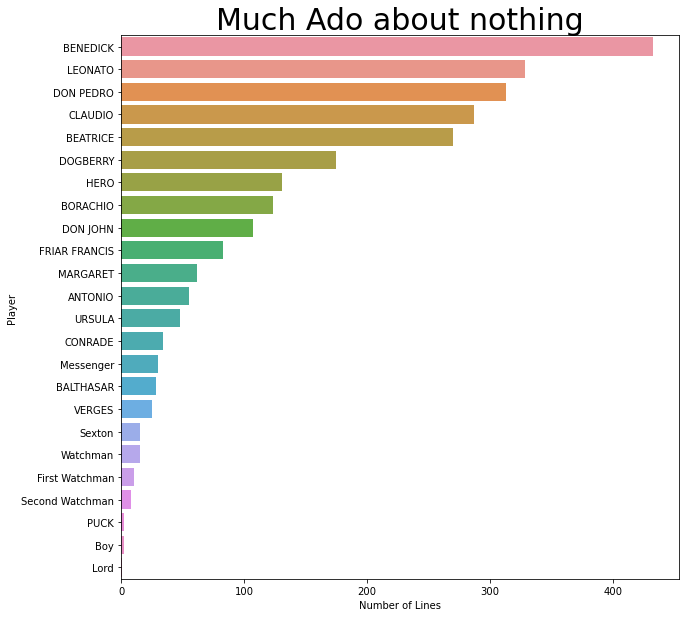

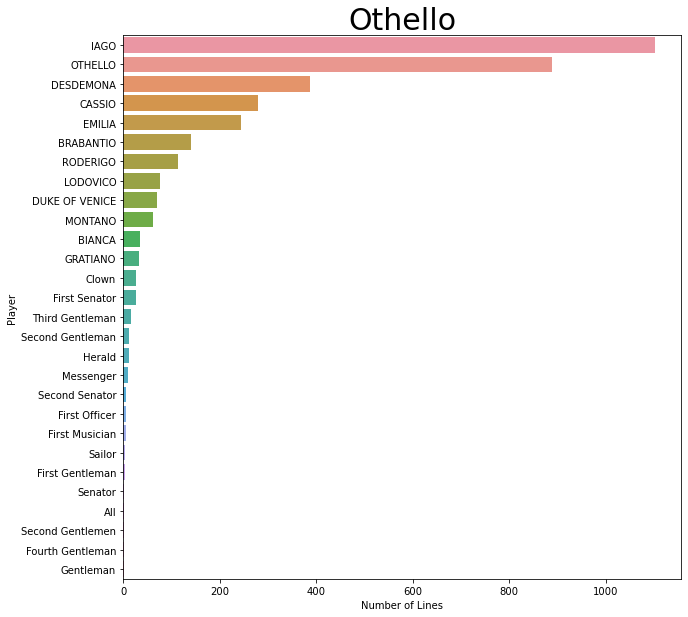

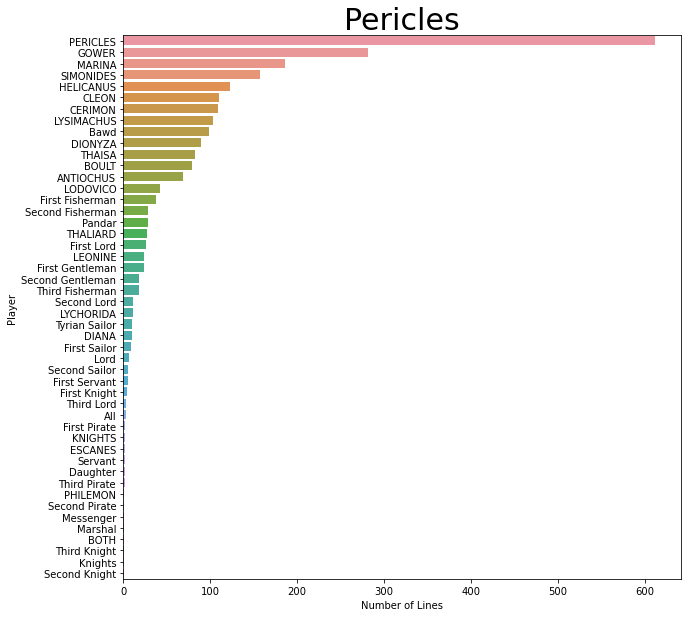

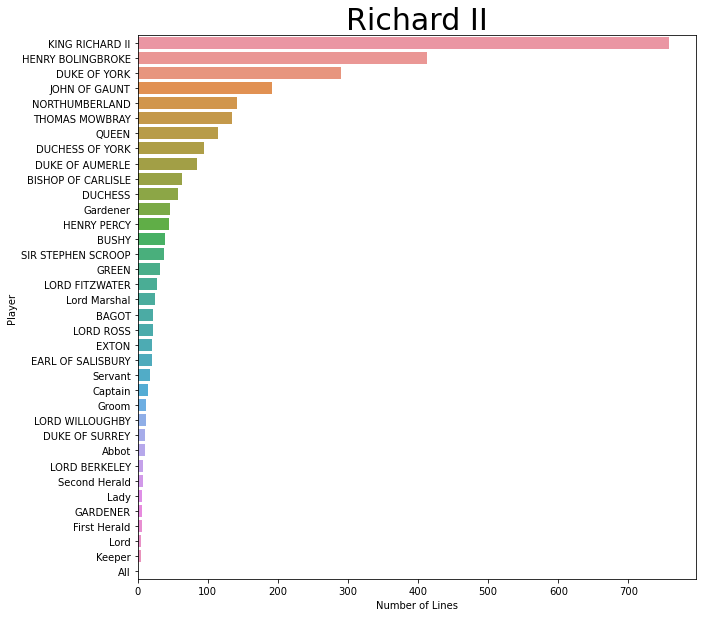

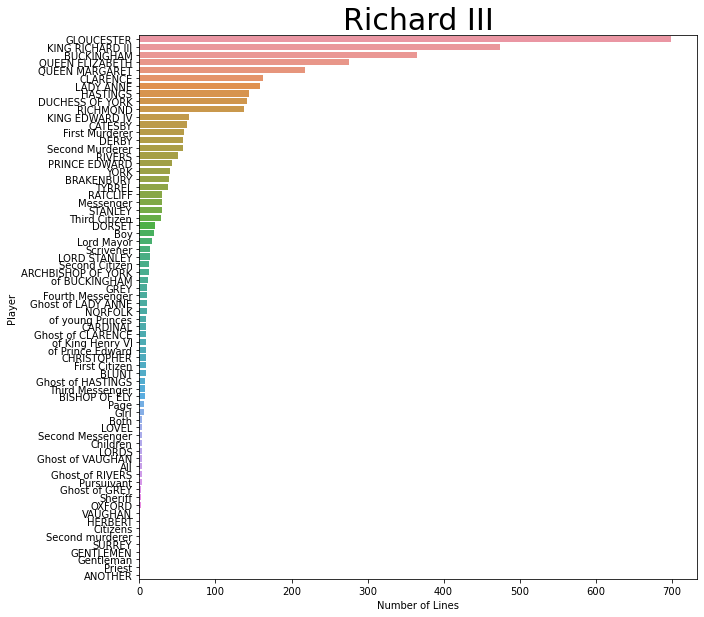

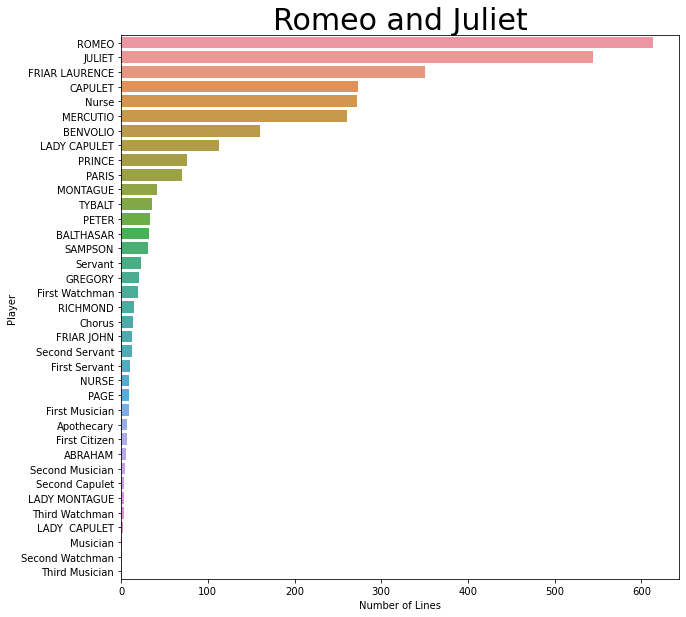

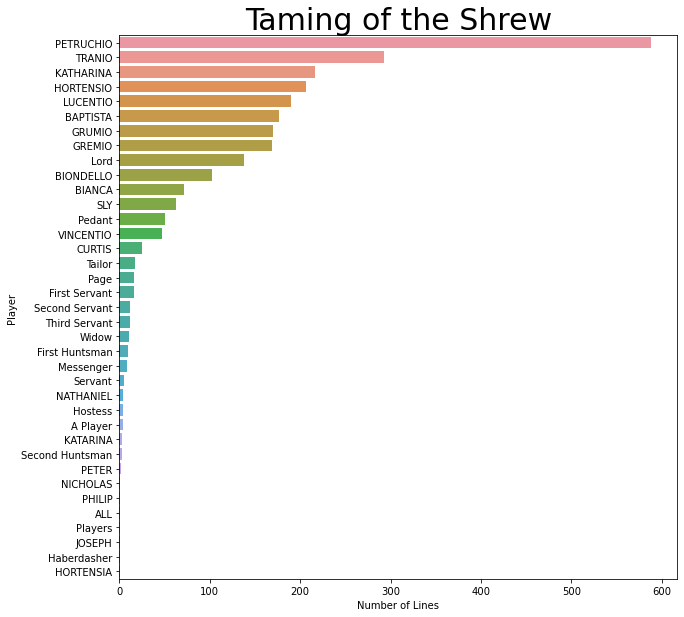

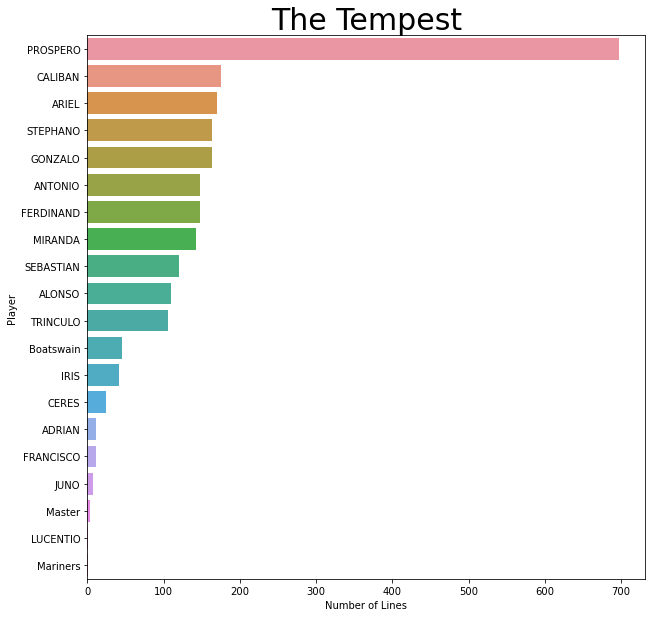

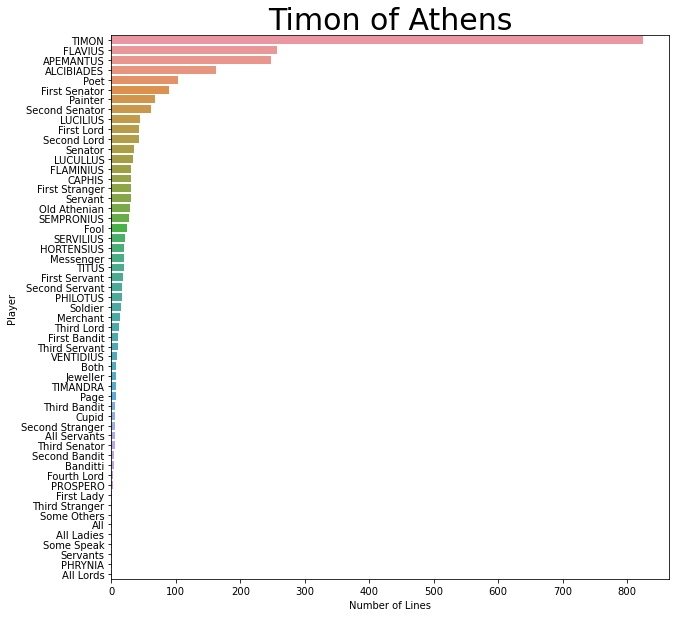

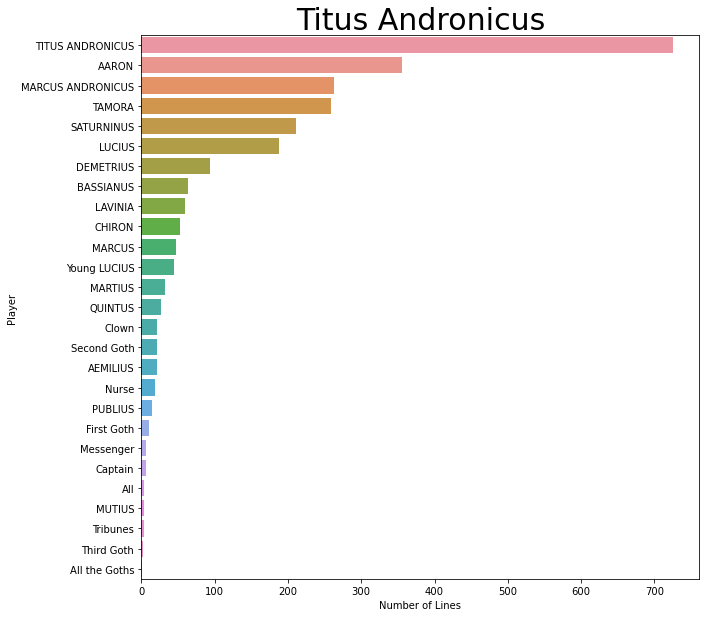

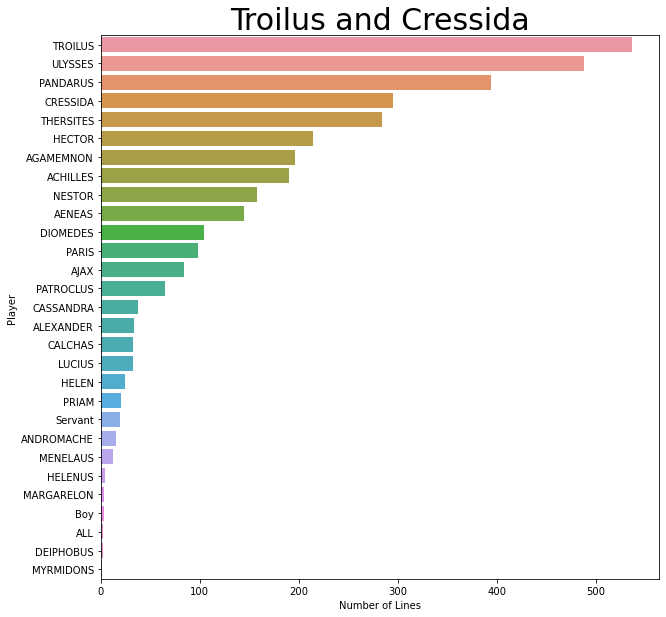

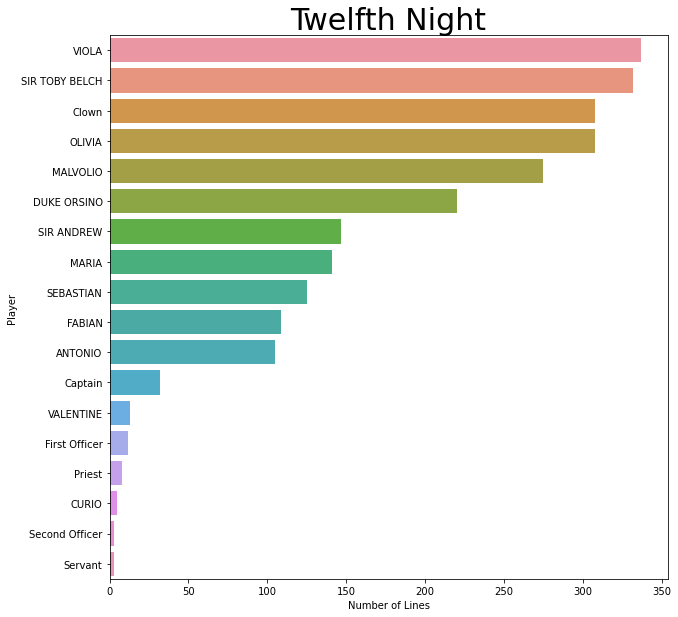

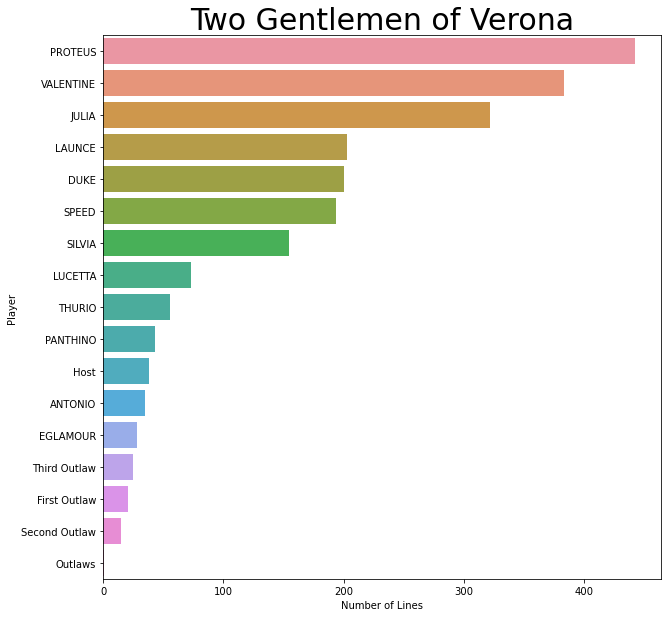

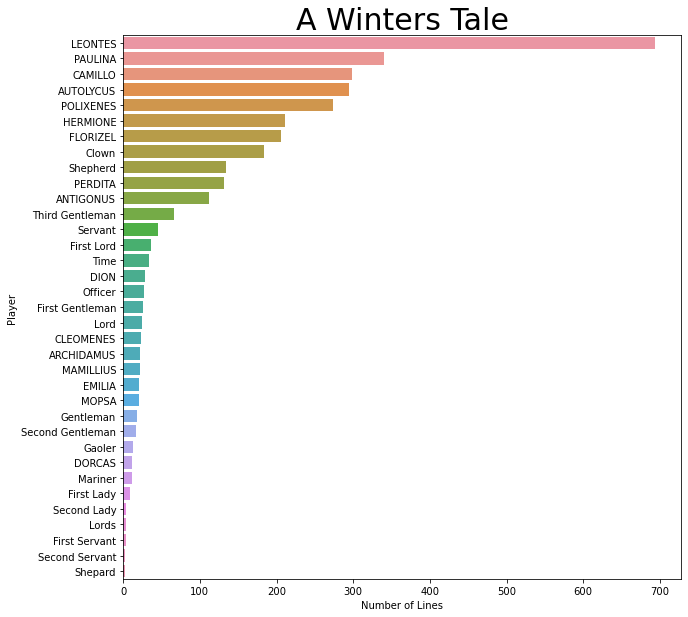

In [12]:
play_name = df['Play'].unique().tolist()
for play in play_name:
    p_line = df[df['Play']==play].groupby('Player').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
    p_line = p_line.to_frame()
    p_line['Player'] = p_line.index.tolist()
    p_line.index = np.arange(0,len(p_line))
    p_line.columns=['Lines','Player']
    plt.figure(figsize=(10,10))
    ax= sns.barplot(x='Lines',y='Player',data=p_line)
    ax.set(xlabel='Number of Lines', ylabel='Player')
    plt.title(play,fontsize=30)
    plt.show()

# Sentiment

In [13]:
from textblob import TextBlob

In [14]:
data = pd.read_csv('../notebooks/datasets/Shakespeare_data.csv', encoding='utf-8')

In [15]:
sentiment = pd.DataFrame(columns=('PlayerLinenumber', 'Player', 'PlayerLine'))
sentiment['PlayerLinenumber'] = data['PlayerLinenumber']
sentiment['Player'] = data['Player']
sentiment['PlayerLine'] = data['PlayerLine']
# Drop nulls
sentiment.dropna()
sent2 = sentiment.groupby(['Player'])['PlayerLine'].apply(list)
sent2 = pd.DataFrame(sent2)
# Get the text sentiment of each character
pol = []
for i in sent2['PlayerLine']:
    txt = TextBlob(str.join(' ', i))
    pol.append( (txt.sentiment.polarity)*10 )
# Temporary dataframe then actual dataframe
character_polarity = pd.DataFrame(sent2.index)
character_polarity = pd.DataFrame({'Player':sent2.index, 'Sentiment':pol})

In [16]:
chars_by_polarity = character_polarity.sort_values(by='Sentiment',ascending=False)

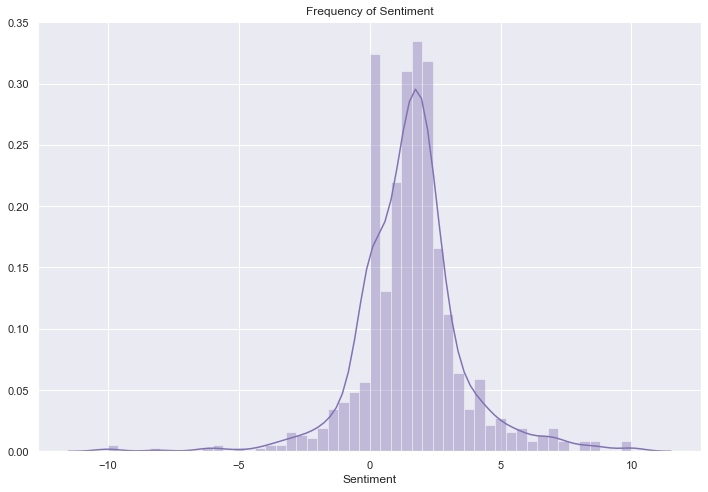

In [17]:
sns.set()
f, axes = plt.subplots(figsize=(10, 7))
# Plot a historgram and kernel density estimate
sns.distplot(character_polarity['Sentiment'], color="m")
plt.title('Frequency of Sentiment')
plt.tight_layout()

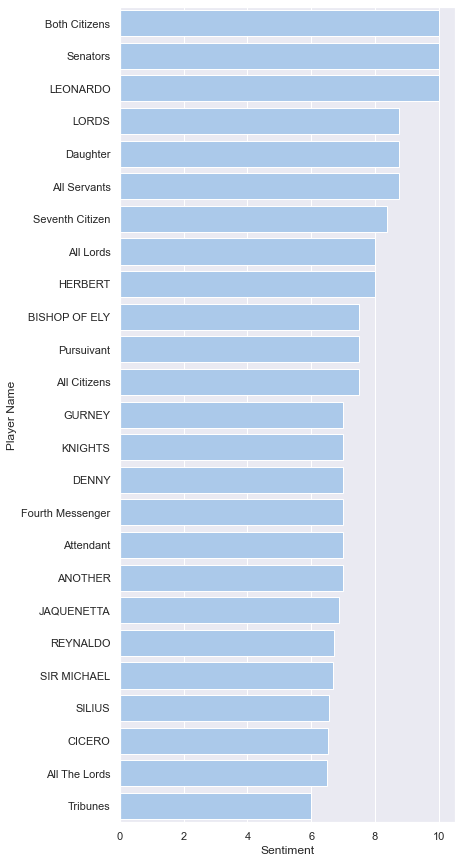

In [18]:
# Plot the top sentiment
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Sentiment", y="Player", data=chars_by_polarity.head(25),
            label="Sentiment", color="b")
ax.set(ylabel="Player Name",
       xlabel="Sentiment")
plt.show()

In [19]:
hamlet = character_polarity[character_polarity.Player == 'HAMLET']

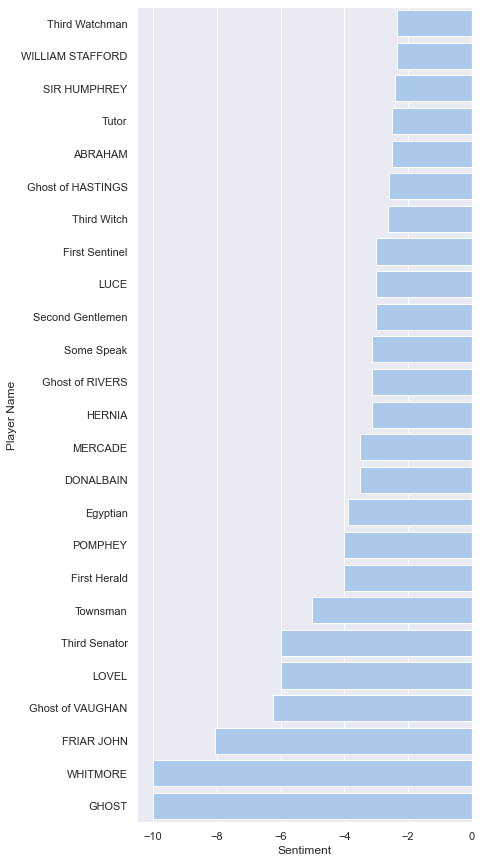

In [20]:
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Sentiment", y="Player", data=chars_by_polarity.tail(25),
            label="Sentiment", color="b")
ax.set(ylabel="Player Name",
       xlabel="Sentiment")
plt.show()

# 3. Further EDA

In [21]:
import pandas as pd
df = pd.read_csv('../notebooks/datasets/Shakespeare_data.csv', encoding='utf-8')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df=df.drop('Dataline',axis=1)
df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [22]:
actsceneline=df['ActSceneLine'].str.split('.',n=-1,expand=True) # We are going to split act scene and line
df1=df
df1['act']=actsceneline[0]
df1['scene']=actsceneline[1]
df1['line']=actsceneline[2]
df1['words_lines']=[len(i.split(' ')) for i in df1['PlayerLine']]
df1=df1.drop('PlayerLine',axis=1)
df1.head()

,Play,PlayerLinenumber,ActSceneLine,Player,act,scene,line,words_lines
3,Henry IV,1.0,1.1.1,KING HENRY IV,1,1,1,9
4,Henry IV,1.0,1.1.2,KING HENRY IV,1,1,2,9
5,Henry IV,1.0,1.1.3,KING HENRY IV,1,1,3,7
6,Henry IV,1.0,1.1.4,KING HENRY IV,1,1,4,7
7,Henry IV,1.0,1.1.5,KING HENRY IV,1,1,5,8


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [24]:
plays_players=(df.groupby(['Play','Player']).count())[['PlayerLinenumber']].reset_index(drop=False)[['Play']]

Text(0.5, 1.0, '4.2.1- Number of Players in Single Play')

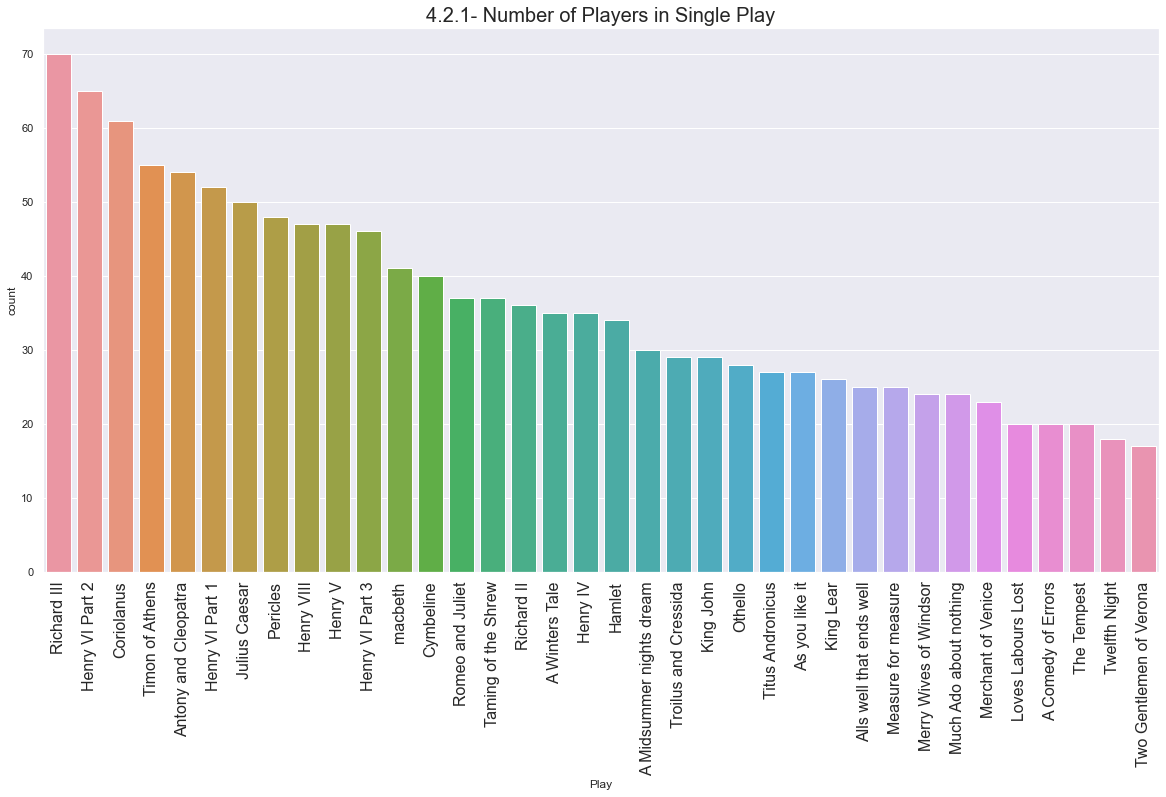

In [25]:
plt.figure(figsize = (20,10))
sns.countplot(x='Play', data=plays_players,order=plays_players['Play'].value_counts().index)
plt.xticks(rotation=90,fontsize=16)
plt.title('4.2.1- Number of Players in Single Play',fontsize=20)

Text(0.5, 1.0, '4.2.2- Players with more than 1 play(Top50)')

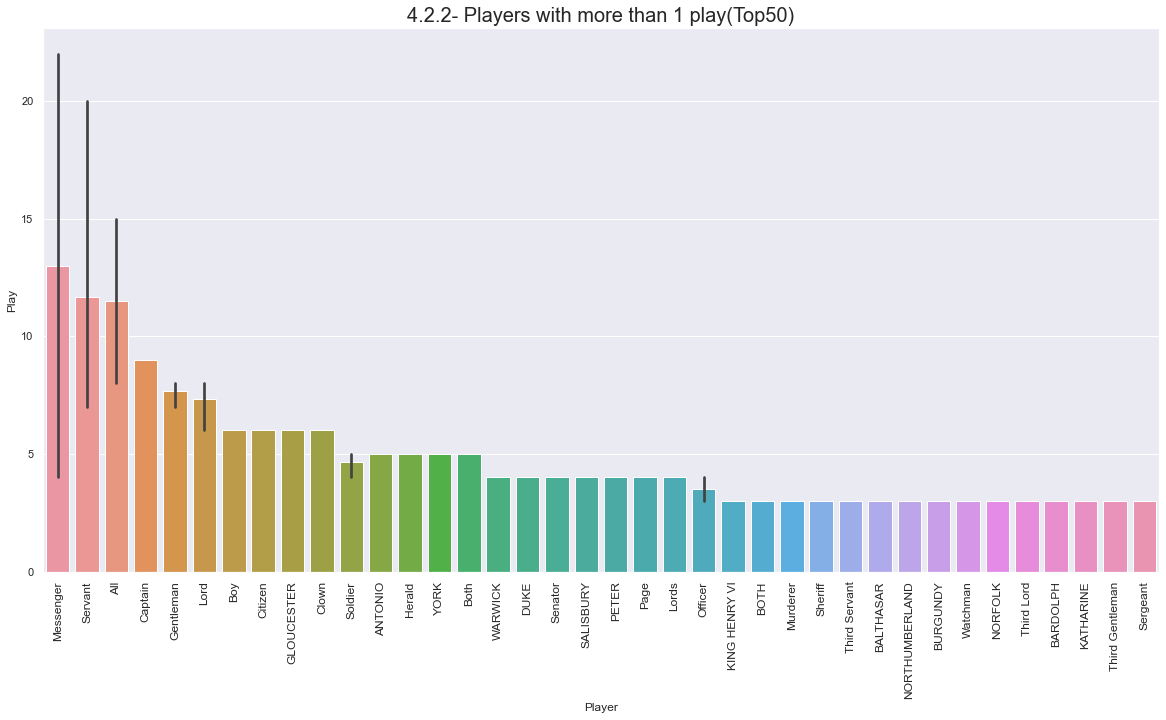

In [26]:
players_plays=(df.groupby(['Player','Play']).count())[['PlayerLinenumber']].reset_index(drop=False)[['Player','Play']]
df2=players_plays.groupby('Player').count().sort_values(by='Play',ascending=False).head(50).reset_index(drop=False)
df2['Player']=df2['Player'].str.replace('ALL','All')
df2['Player']=df2['Player'].str.replace('First ','')
df2['Player']=df2['Player'].str.replace('Second ','')
plt.figure(figsize = (20,10))
sns.barplot(x=df2['Player'], y=df2['Play'])
plt.xticks(rotation=90,fontsize=12)
plt.title('4.2.2- Players with more than 1 play(Top50)',fontsize=20)

Most Common Players of all Plays: Characters with presence in more than 1 play

Text(0.5, 1.0, '4.2.2- Players with more than 1 play(Top50)')

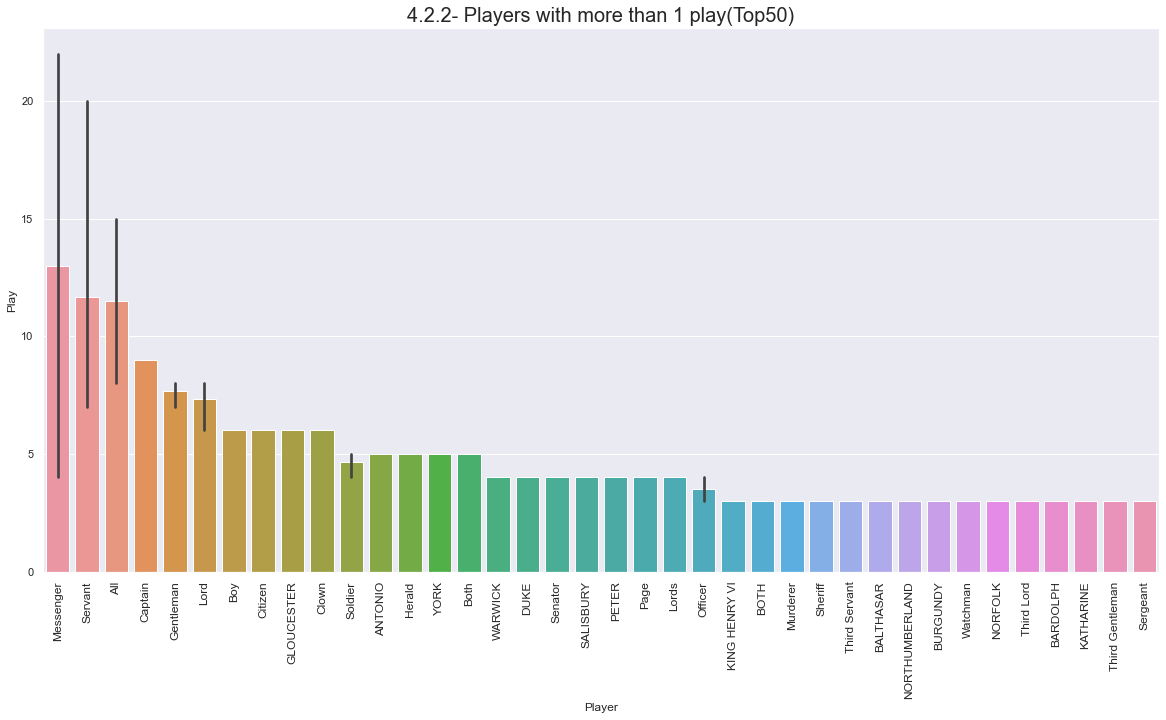

In [27]:
players_plays=(df.groupby(['Player','Play']).count())[['PlayerLinenumber']].reset_index(drop=False)[['Player','Play']]
df2=players_plays.groupby('Player').count().sort_values(by='Play',ascending=False).head(50).reset_index(drop=False)
df2['Player']=df2['Player'].str.replace('ALL','All')
df2['Player']=df2['Player'].str.replace('First ','')
df2['Player']=df2['Player'].str.replace('Second ','')
plt.figure(figsize = (20,10))
sns.barplot(x=df2['Player'], y=df2['Play'])
plt.xticks(rotation=90,fontsize=12)
plt.title('4.2.2- Players with more than 1 play(Top50)',fontsize=20)

Longest Plays: More the lines, longer the duration

Text(0.5, 1.0, '4.2.3- Plays with number of lines')

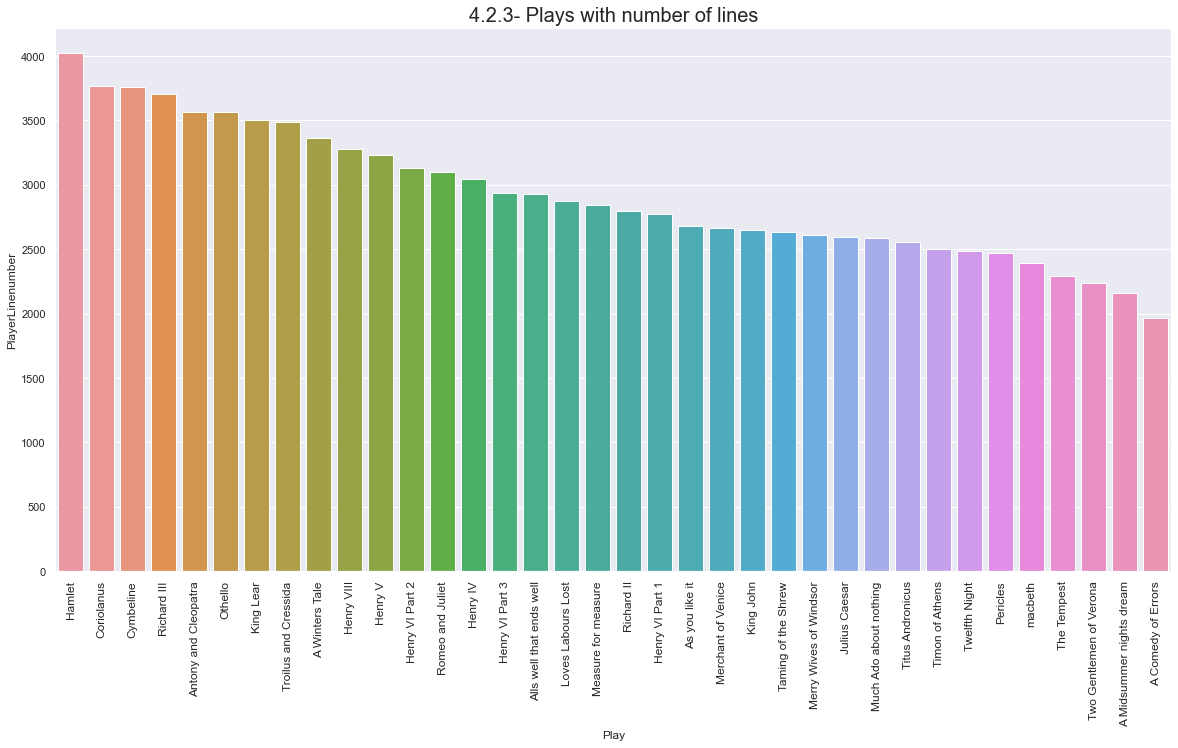

In [28]:
max_lines=(df.groupby(['Play']).count())[['PlayerLinenumber']].reset_index(drop=False)
max_lines=max_lines.sort_values(by=['PlayerLinenumber'],ascending=False).reset_index(drop=True)
plt.figure(figsize = (20,10))
sns.barplot(x=max_lines['Play'], y=max_lines['PlayerLinenumber'])
plt.xticks(rotation=90,fontsize=12)
plt.title('4.2.3- Plays with number of lines',fontsize=20)

Text(0.5, 1.0, '4.2.4- Plays with number of scenes')

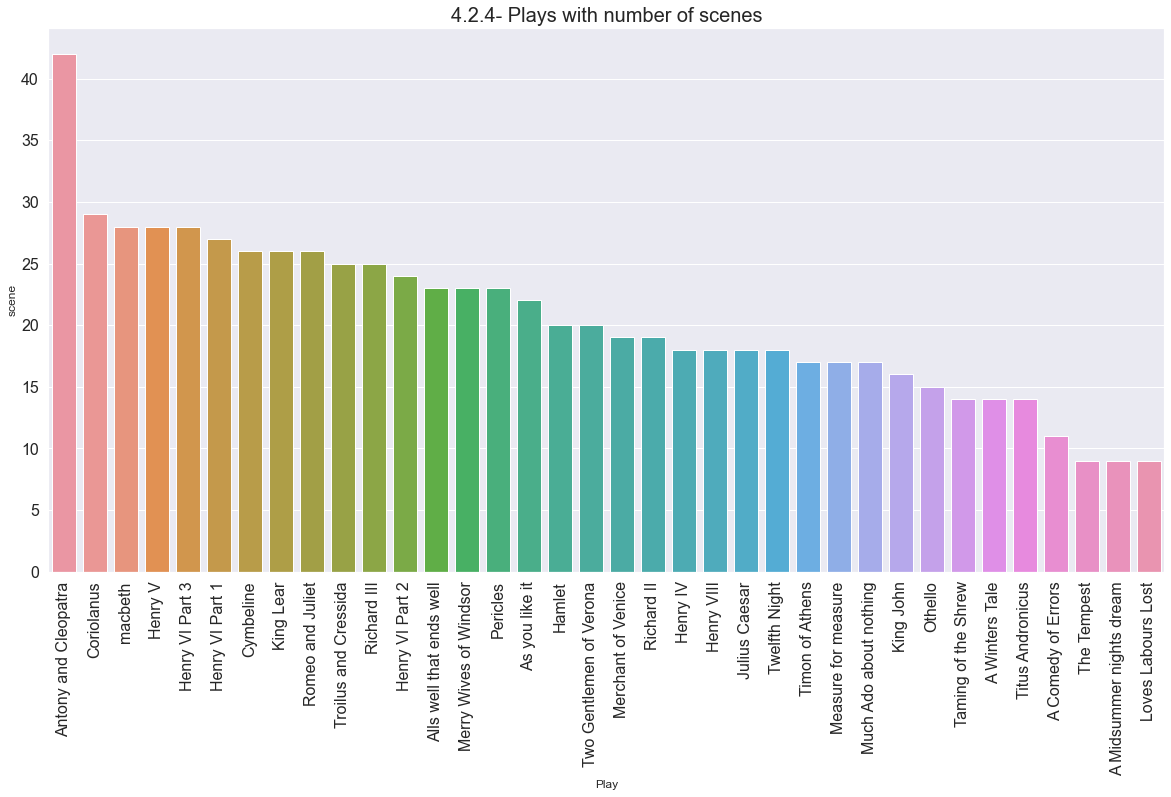

In [29]:
max_lines=(df.groupby(['Play','act','scene']).count()).reset_index(drop=False)[['Play','act','scene']].groupby(['Play'                                                                                                 ,'act']).count()
Play_with_max_scenes=max_lines.reset_index(drop=False)[['Play','scene']].groupby('Play').sum().reset_index(drop=False)
max_lines=Play_with_max_scenes.sort_values(by=['scene'],ascending=False).reset_index(drop=True)
plt.figure(figsize = (20,10))
sns.barplot(x=max_lines['Play'], y=max_lines['scene'])
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.title('4.2.4- Plays with number of scenes',fontsize=20)

Text(0.5, 1.0, '4.2.4- Plays with number of scenes')

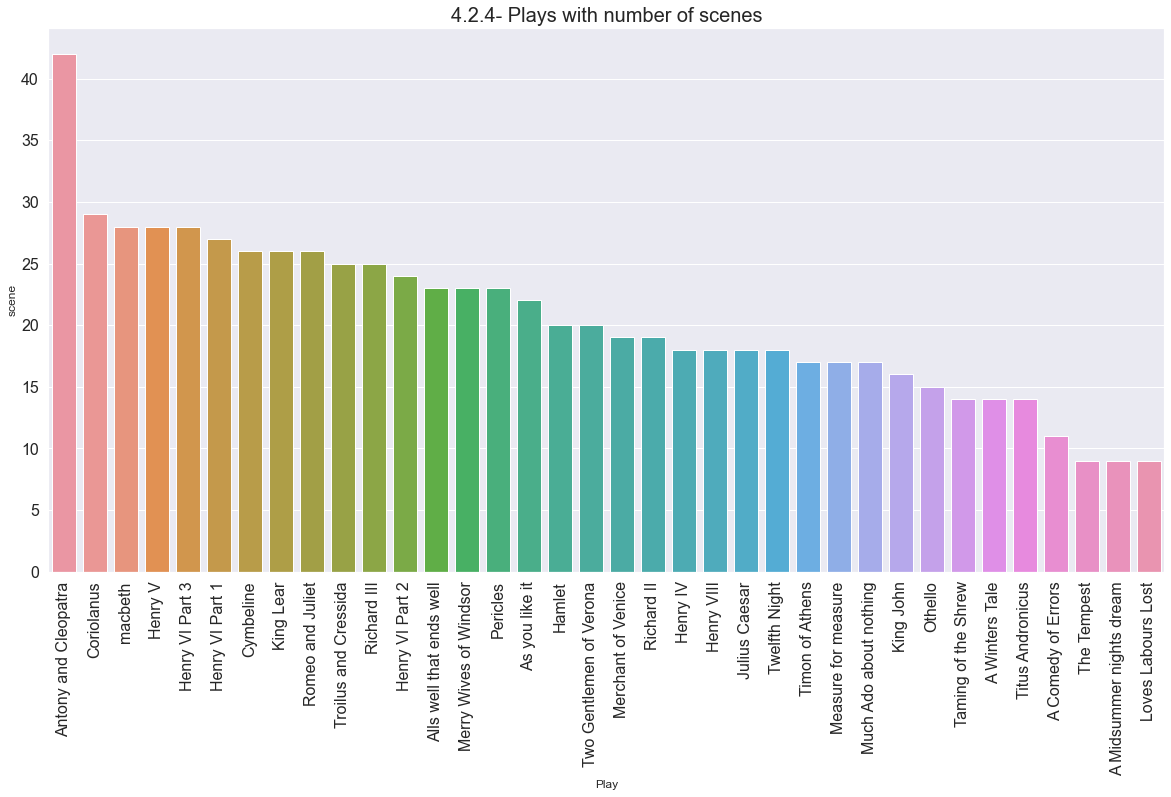

In [30]:
max_lines=(df.groupby(['Play','act','scene']).count()).reset_index(drop=False)[['Play','act','scene']].groupby(['Play'                                                                                                 ,'act']).count()
Play_with_max_scenes=max_lines.reset_index(drop=False)[['Play','scene']].groupby('Play').sum().reset_index(drop=False)
max_lines=Play_with_max_scenes.sort_values(by=['scene'],ascending=False).reset_index(drop=True)
plt.figure(figsize = (20,10))
sns.barplot(x=max_lines['Play'], y=max_lines['scene'])
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.title('4.2.4- Plays with number of scenes',fontsize=20)

Plays with highest amount of cinematography

Text(0.5, 1.0, '4.2.5- Star Players of Shakspeare(Top20)')

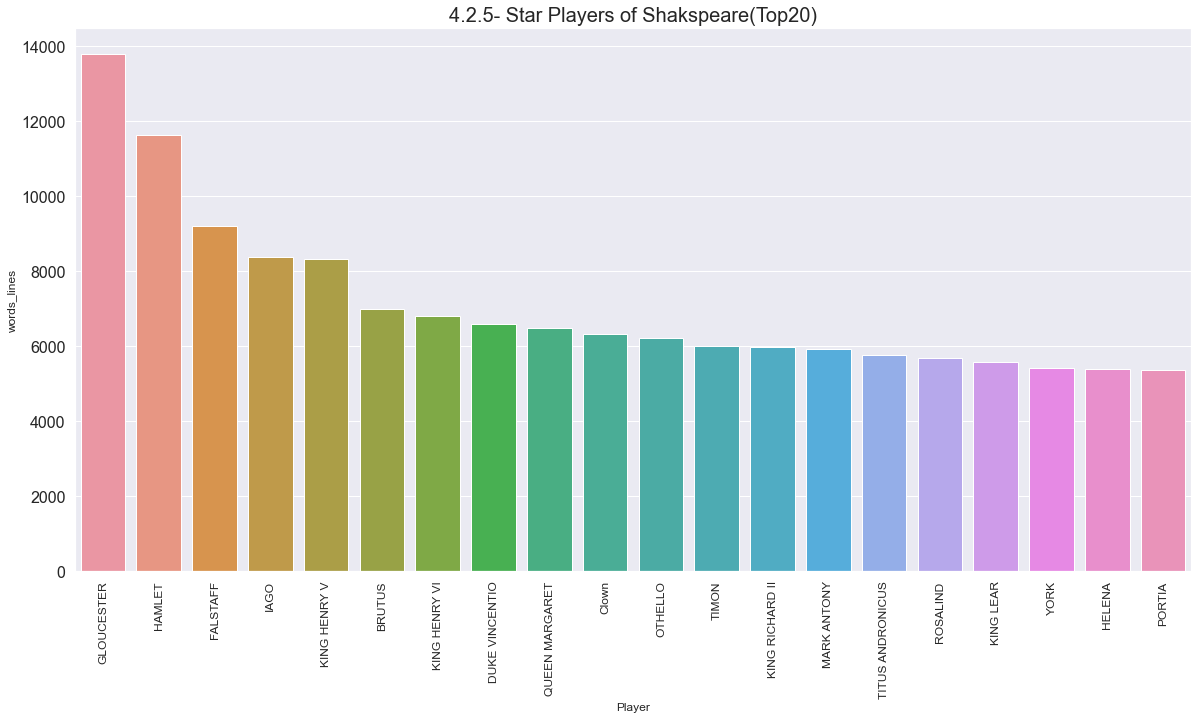

In [31]:
facetime=df[['Player','words_lines']]
max_lines=facetime.groupby(['Player']).sum().reset_index(drop=False).sort_values(by=['words_lines'],ascending=False).reset_index(drop=True)[:20]
plt.figure(figsize = (20,10))
sns.barplot(x=max_lines['Player'], y=max_lines['words_lines'])
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.title('4.2.5- Star Players of Shakspeare(Top20)',fontsize=20)

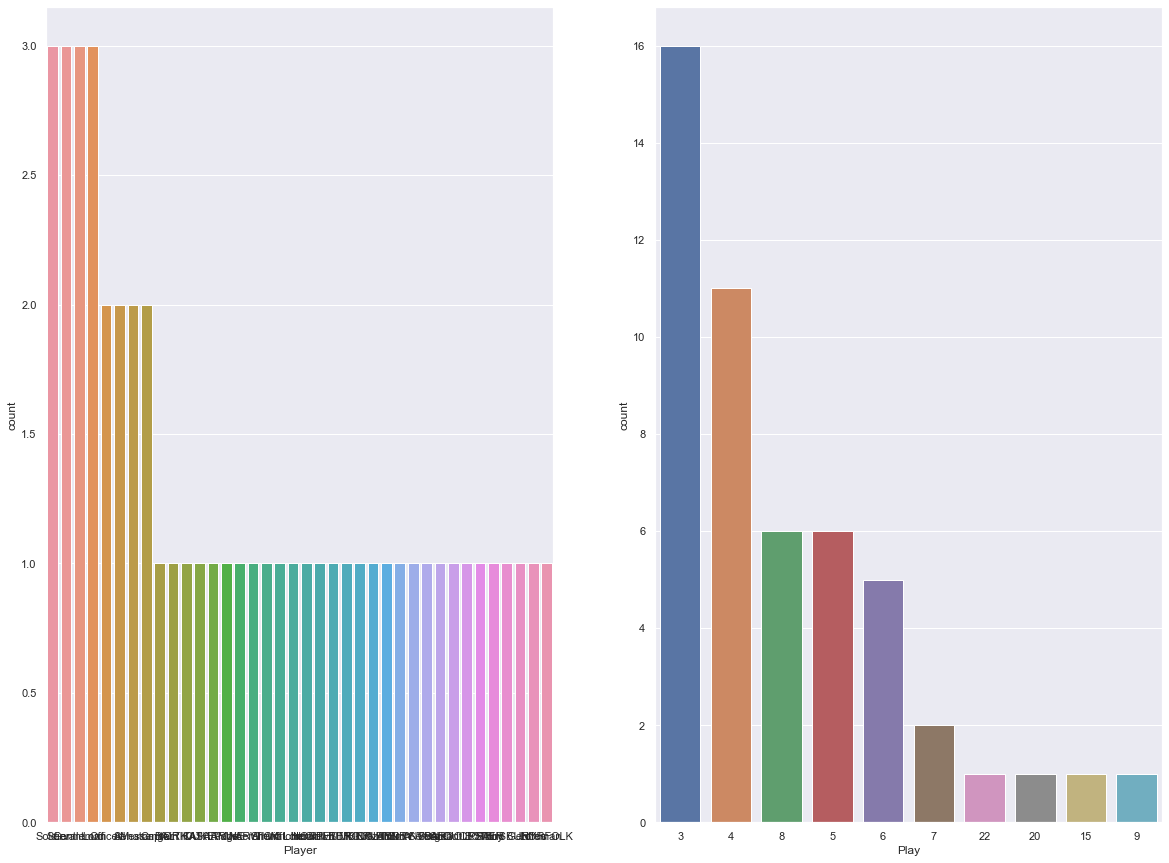

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 15))
for variable, subplot in zip(df2.columns, ax.flatten()):
    sns.countplot(df2[variable], ax=subplot,order=df2[variable].value_counts().index)

# 4. Classification

In [33]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [34]:
import pandas as pd
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
import numpy as np 
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

data = pd.read_csv('../notebooks/datasets/Shakespeare_data.csv', encoding='utf-8')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data=data.drop('Dataline',axis=1)
actsceneline=data['ActSceneLine'].str.split('.',n=-1,expand=True) # We are going to split act scene and line
df1=data
df1['act']=actsceneline[0]
df1['scene']=actsceneline[1]
df1['line']=actsceneline[2]
df1['words_lines']=[len(i.split(' ')) for i in df1['PlayerLine']]
df1=df1.drop(['PlayerLine','ActSceneLine'],axis=1)
from sklearn.utils import shuffle
df2=shuffle(df1).reset_index(drop=True)
df2.head()

,Play,PlayerLinenumber,Player,act,scene,line,words_lines
0,Timon of Athens,29.0,Painter,5,1,85,4
1,Alls well that ends well,19.0,First Lord,4,3,49,11
2,Coriolanus,98.0,BRUTUS,3,1,276,6
3,Othello,88.0,IAGO,1,3,421,10
4,Antony and Cleopatra,6.0,DOMITIUS ENOBARBUS,4,6,20,7


In [35]:
X=df2.drop(['Player'],axis=1)
Y=df2[['Player']]
df=pd.get_dummies(df2,columns=df2.columns)
X=df
Y=np.array(df2['Player'])
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

# Naive - Bayes Classification

In [36]:
model=MultinomialNB() # Model design
model.fit(X_train,Y_train) # Training our Multinomial NB Model

MultiPredicted=model.predict(X_test) #testing of Multinomial NB Model
ACCU_MULTI=metrics.accuracy_score(Y_test, MultiPredicted)
print("MULTINOMIAL NAIVE-BAYSE HAS ACCURACY OF: "+str(ACCU_MULTI*100))
CONFUSION_MATRIX_MULTINB=metrics.confusion_matrix(Y_test, MultiPredicted)
print('confusion matrix: Naive-Bayse Classifier')
print(CONFUSION_MATRIX_MULTINB)

MULTINOMIAL NAIVE-BAYSE HAS ACCURACY OF: 83.9427511768342
confusion matrix: Naive-Bayse Classifier
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


# 5. Conclusion

# Final thoughts and further implementations

One other way of implementing is getting the word count from the Word Vectorizer and following the routine. 

We do the Word Vectorization on the PlayerLine attribute and we will get a vectorized output of each sentences spoken by the player. In a way we are converting the text field into numerical field becuase only then the machine can interpret the model. By following that approach, the accuracy of the model will be less around 64%. So we go for this approach.

We can say that we can follow and implement the Word2Vec implementation too.